In [1]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
plt.style.use('fivethirtyeight')
import warnings
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../SadykovVV_8E21/data/raw/life_expectancy_data.csv')

In [3]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            185
percentage expenditure               0
Hepatitis B                        525
Measles                              0
 BMI                                33
under-five deaths                    0
Polio                               18
Total expenditure                  215
Diphtheria                          18
 HIV/AIDS                            0
GDP                                415
Population                         604
 thinness  1-19 years               33
 thinness 5-9 years                 33
Income composition of resources    155
Schooling                          151
dtype: int64

Мы видим, что многие данные отсутствуют, заполним их средним значением

In [5]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2732.000000,2724.000000,2724.000000,2732.000000,2547.000000,2732.000000,2207.000000,2732.000000,2699.000000,2732.000000,2714.000000,2517.000000,2714.000000,2732.000000,2317.000000,2.128000e+03,2699.000000,2699.000000,2577.000000,2581.000000
mean,2007.501098,69.120228,165.923642,30.588946,4.555748,727.049563,80.860897,2430.580527,38.069767,42.385066,82.409359,5.946007,82.273397,1.722328,7316.813082,1.245470e+07,4.903927,4.935495,0.624236,11.951724
std,4.626314,9.511317,123.837567,118.158278,4.034548,1974.303746,25.130776,11240.642911,20.062308,160.480411,23.421806,2.506294,23.628897,4.962085,14020.856082,5.761456e+07,4.448684,4.540056,0.211894,3.376084
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,75.000000,0.000000,0.850000,4.595646,77.000000,0.000000,19.100000,0.000000,77.000000,4.280000,78.000000,0.100000,464.184650,1.917392e+05,1.600000,1.600000,0.489000,10.100000
50%,2007.000000,72.000000,145.000000,3.000000,3.650000,64.395284,92.000000,17.000000,42.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.383743e+06,3.400000,3.400000,0.675000,12.300000
75%,2012.000000,75.600000,228.250000,23.000000,7.600000,437.086674,97.000000,370.500000,56.100000,30.000000,97.000000,7.500000,97.000000,0.800000,5828.745662,7.475598e+06,7.200000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [6]:
#data cleaning
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)

data['Life expectancy']=imputer.fit_transform(data[['Life expectancy']])
data['Adult Mortality']=imputer.fit_transform(data[['Adult Mortality']])
data['Alcohol']=imputer.fit_transform(data[['Alcohol']])
data['Hepatitis B']=imputer.fit_transform(data[['Hepatitis B']])
data[' BMI ']=imputer.fit_transform(data[[' BMI ']])
data['Polio']=imputer.fit_transform(data[['Polio']])
data['Total expenditure']=imputer.fit_transform(data[['Total expenditure']])
data['Diphtheria ']=imputer.fit_transform(data[['Diphtheria ']])
data['GDP']=imputer.fit_transform(data[['GDP']])
data['Population']=imputer.fit_transform(data[['Population']])
data[' thinness  1-19 years']=imputer.fit_transform(data[[' thinness  1-19 years']])
data[' thinness 5-9 years']=imputer.fit_transform(data[[' thinness 5-9 years']])
data['Income composition of resources']=imputer.fit_transform(data[['Income composition of resources']])
data['Schooling']=imputer.fit_transform(data[['Schooling']])


В данных есть текстовые параметры: Country, Status
Чтобы заменить названия стран, заменим их числом, который будет соответствовать какому-то континенту (Азию и Европу разделим)
1. Европа
2. Азия
3. Африка
4. Северная Америка
5. Южная Америка
6. Океания
Чтобы заменить статус стран заменим их на 1(развитая) и 0(развивающаяся)
   

In [7]:
data['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [149]:
data['Status'].loc[(data['Status']=='Developed')] = 1
data['Status'].loc[(data['Status']=='Developing')] = 0
data['Status']=data['Status'].astype('int8')

In [150]:
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,2
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,2


In [10]:
data['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [11]:
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

In [54]:
data['Country'].replace('Republic of Korea', 'South Korea', inplace=True)
data['Continent'] = data['Country'].apply(map_country2continent)

In [75]:
data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

In [100]:
data_new = pd.Series(' ',index=['Country'])
for value in range(len(data['Life expectancy'])):
    if data['Continent'][value] == None:
        data_new = data_new + data['Country'][value];

In [101]:
for value in range(len(data_new)):
    print(data_new[value])

 Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Bolivia (Plurinational State of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Iran (Islamic Republic of)Micronesia (Federated States of)Micronesia (Federated States of)Micronesia (Federated States of)Microne

Видим, что готовая библиотека не справилась, придется писать еще алгоритм

In [107]:
for value in range(len(data['Life expectancy'])):
    if data['Continent'][value] == None:
        if data['Country'][value] == 'Bolivia (Plurinational State of)':
            data['Continent'][value] = 'South America'
        elif data['Country'][value] == 'Iran (Islamic Republic of)':
            data['Continent'][value] = 'Asia'
        elif data['Country'][value] == 'Micronesia (Federated States of)':
            data['Continent'][value] = 'Oceania'
        elif data['Country'][value] == 'The former Yugoslav republic of Macedonia':
            data['Continent'][value] = 'Europe'
        elif data['Country'][value] =='Venezuela (Bolivarian Republic of)':
            data['Continent'][value] = 'South America'

In [112]:
data.drop(columns=['Country'], inplace=True)

In [114]:
data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [147]:
data['Continent'].loc[(data['Continent']=='Europe')] = 1
data['Continent'].loc[(data['Continent']=='Asia')] = 2
data['Continent'].loc[(data['Continent']=='Africa')] = 3
data['Continent'].loc[(data['Continent']=='North America')] = 4
data['Continent'].loc[(data['Continent']=='South America')] = 5
data['Continent'].loc[(data['Continent']=='Oceania')] = 6
data['Continent'] = data['Continent'].astype('int8')

In [148]:
data['Continent'].unique()

array([2, 1, 3, 4, 5, 6], dtype=int8)

In [132]:
data.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,2
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,2
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,2
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,2
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,2


In [119]:
data.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Continent                          0
dtype: int64

Видим, что команды сработали, потерь в данных нет

Теперь, проанализируем графически количество стран по статусу, количество данных по годам, продолжительность жизни по странам и по статусу, а также, разделив на возрастные категории продолжительность жизни, посчитаем количество данных, входящие в категории

Text(0.5, 1.0, 'Year')

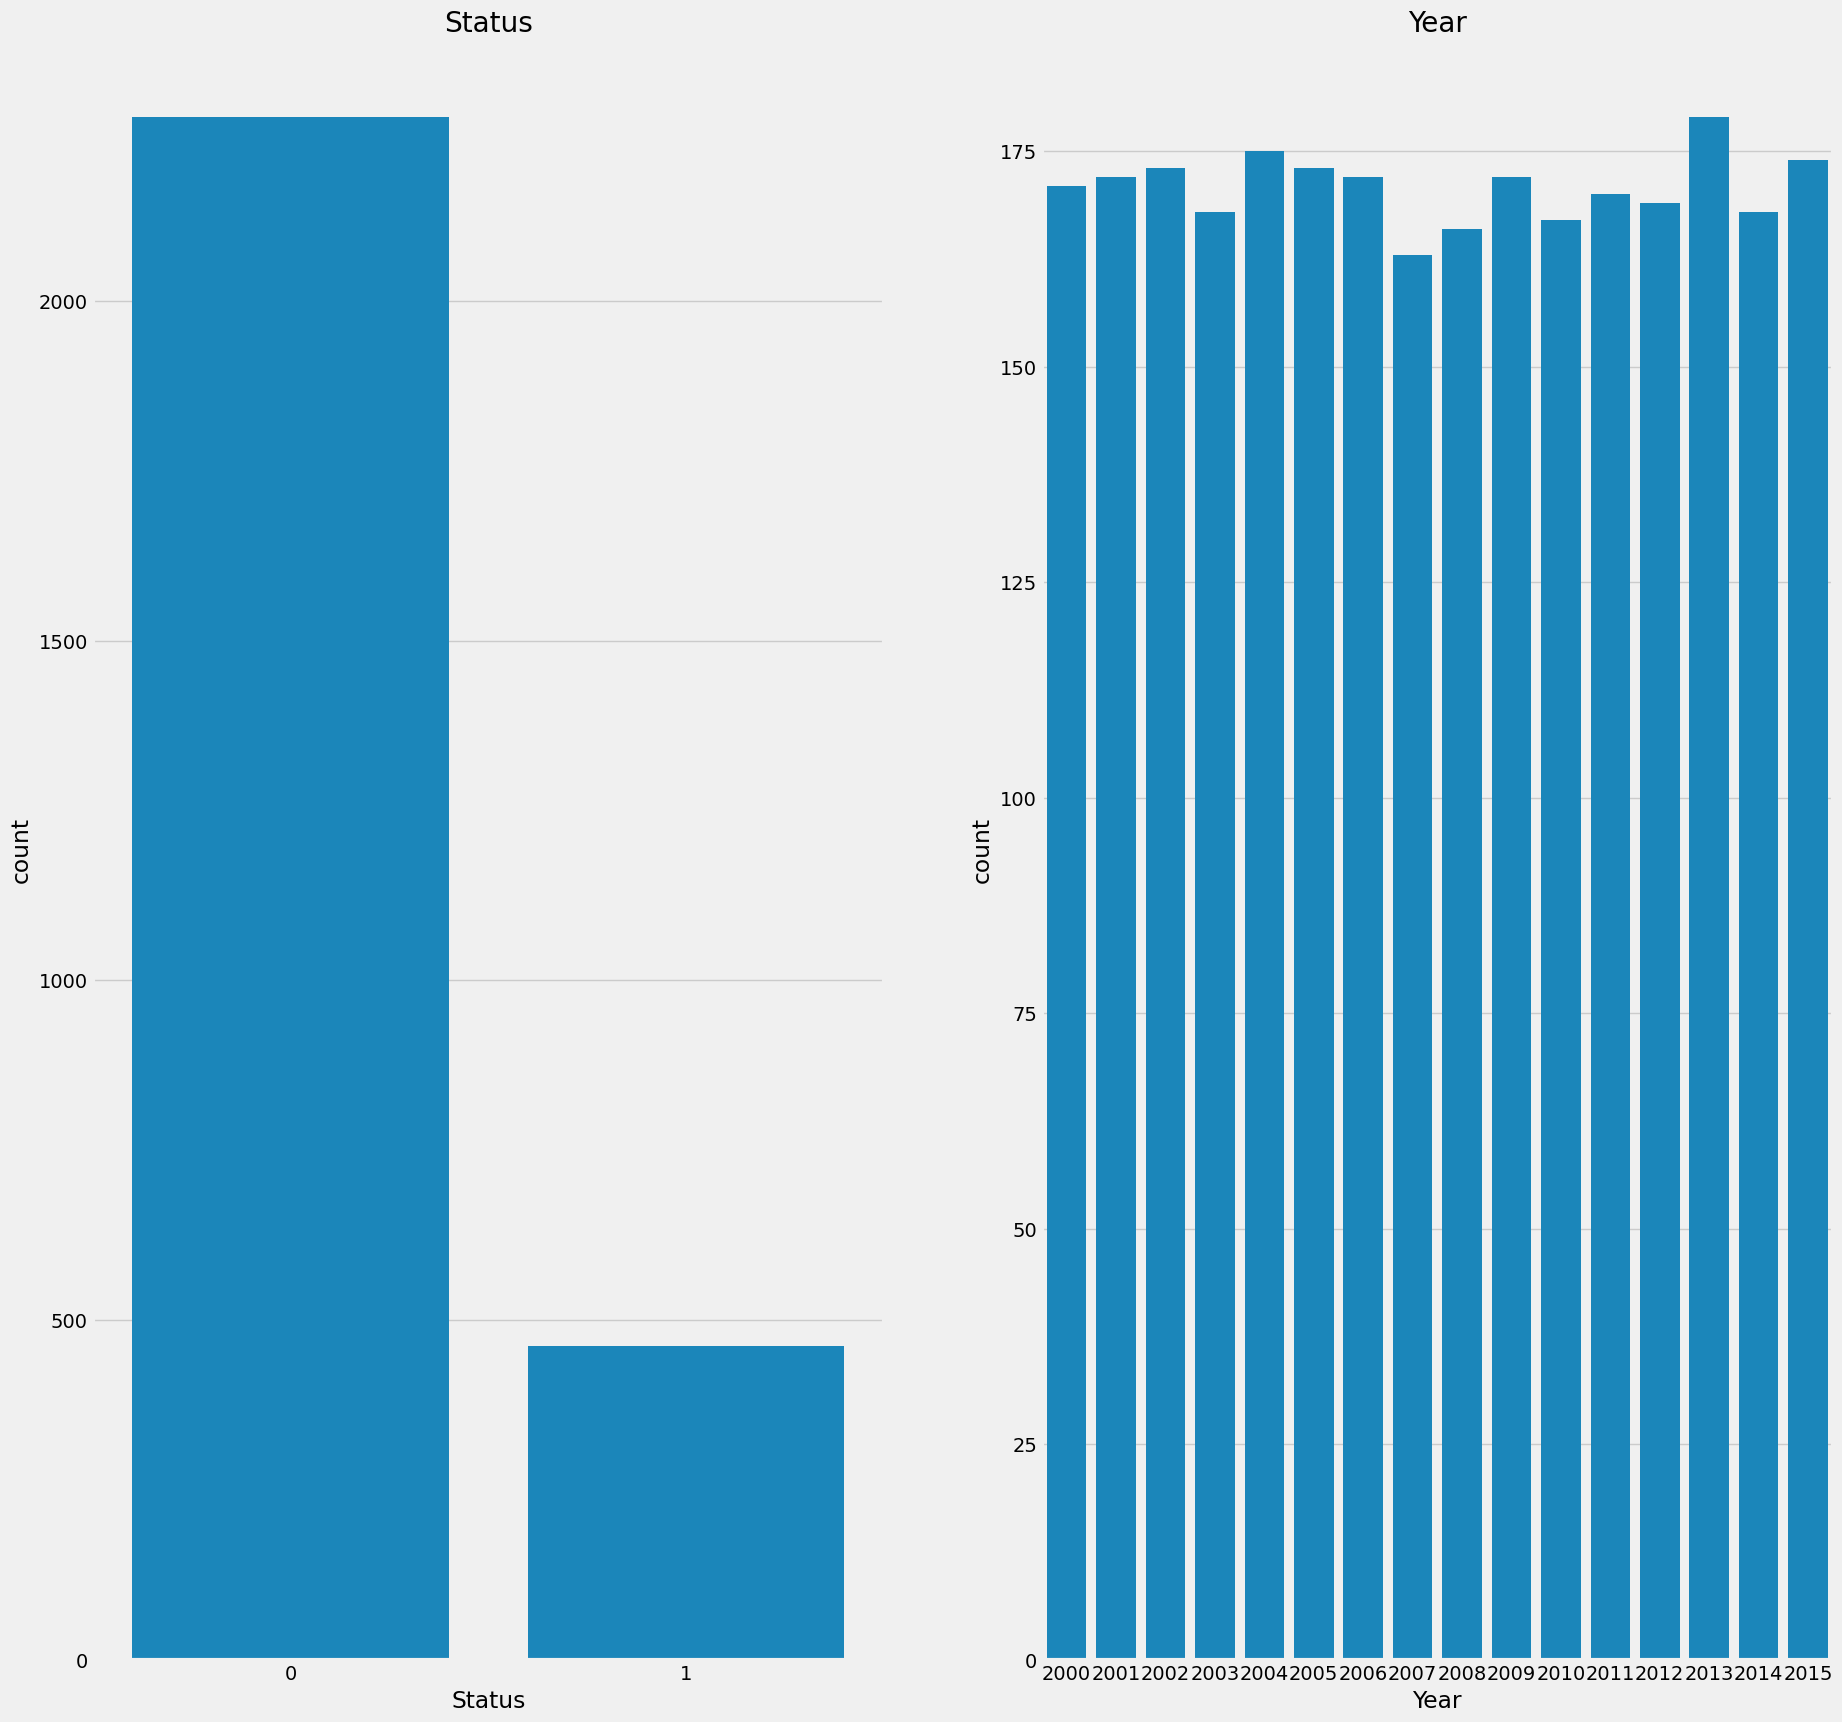

In [121]:
f,ax=plt.subplots(1,2,figsize=(20,20))
sns.countplot(x='Status',data=data,ax=ax[0])
ax[0].set_title('Status')
sns.countplot(x='Year',data=data,ax=ax[1])
ax[1].set_title('Year')

In [16]:
Y_E= pd.Series(1,index=["30-40", "41-47", "48-54", "55-59", "60-66","67-71","72-76","77-81","82-88",">89"])
for value in range(len(data['Life expectancy'])):
    if data['Life expectancy'][value] < 41:
        Y_E["30-40"] = Y_E["30-40"] + 1;
    elif 41 <= data['Life expectancy'][value] < 48:
        Y_E["41-47"] = Y_E["41-47"] + 1;
    elif 47 <= data['Life expectancy'][value] < 55:
        Y_E["48-54"] = Y_E["48-54"] + 1;
    elif 55 <= data['Life expectancy'][value] < 60:
        Y_E["55-59"] = Y_E["55-59"] + 1;
    elif 60 <= data['Life expectancy'][value] < 67:
        Y_E["60-66"] = Y_E["60-66"] + 1;
    elif 67 <= data['Life expectancy'][value] < 72:
        Y_E["67-71"] = Y_E["67-71"] + 1;
    elif 72 <= data['Life expectancy'][value] < 77:
        Y_E["72-76"] = Y_E["72-76"] + 1;
    elif 77 <= data['Life expectancy'][value] < 82:
        Y_E["77-81"] = Y_E["77-81"] + 1;
    elif 82 <= data['Life expectancy'][value] < 89:
        Y_E["82-88"] = Y_E["82-88"] + 1;
    elif data['Life expectancy'][value] >=89 :
        Y_E[">89"] = Y_E[">89"] + 1;

Text(0.5, 1.0, 'Life expectancy')

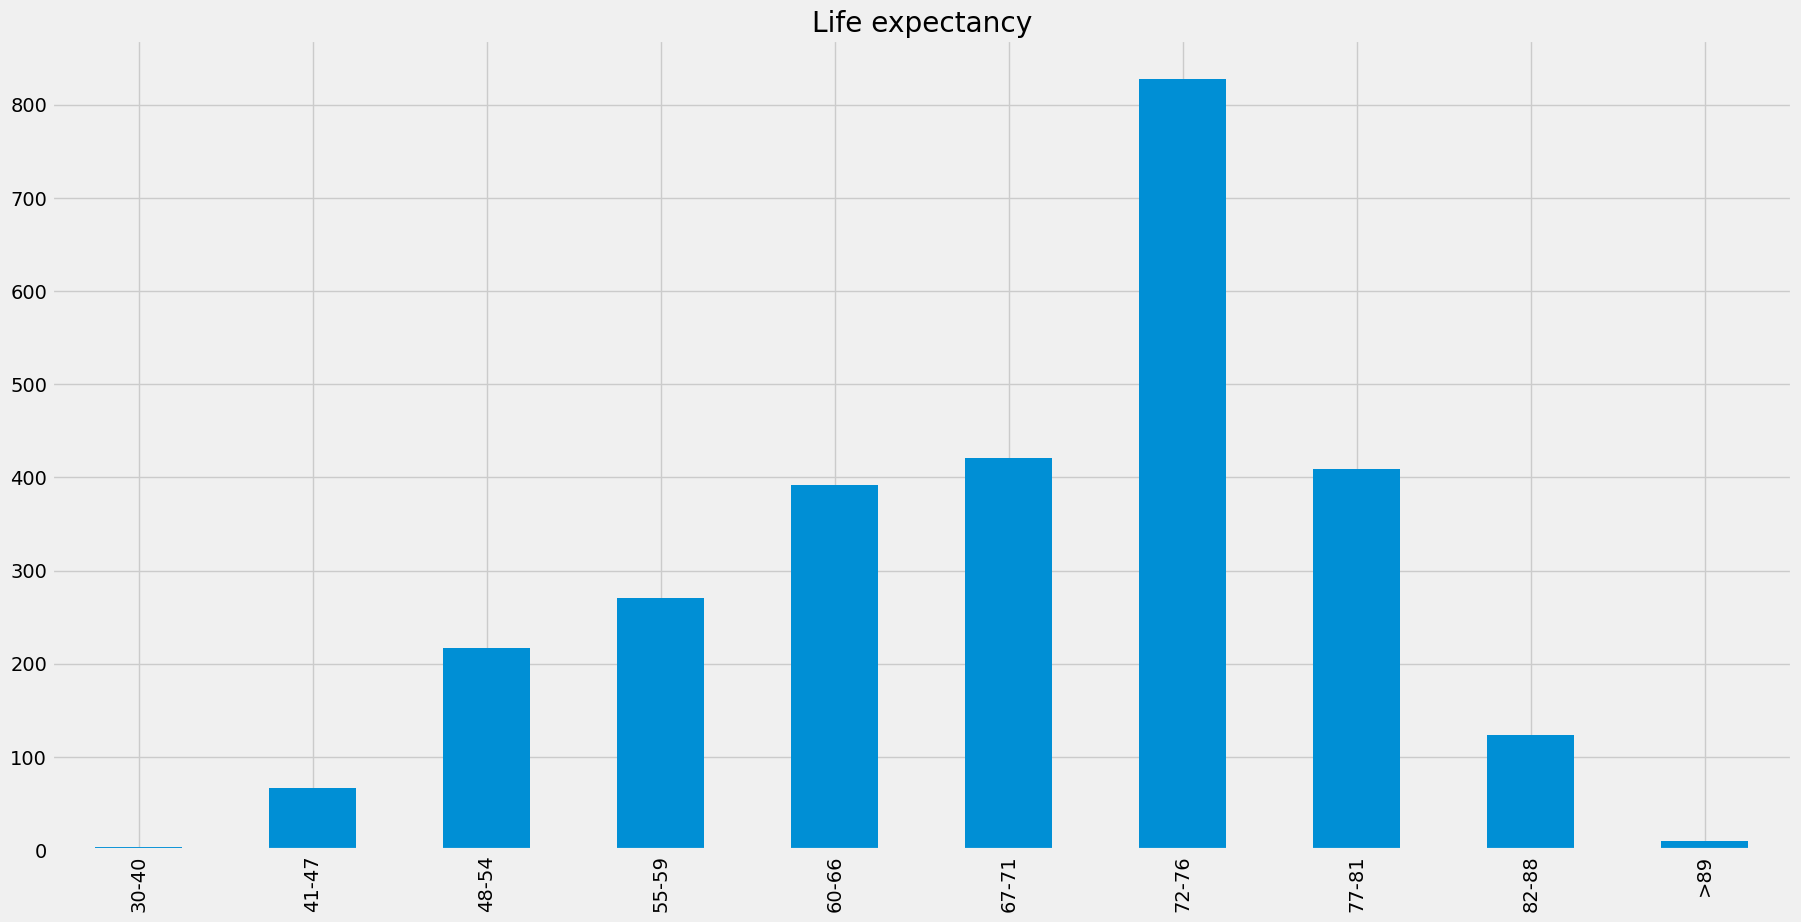

In [17]:
f,ax=plt.subplots(1,1,figsize=(20,10))
Y_E.plot.bar(ax=ax)
ax.set_title('Life expectancy')

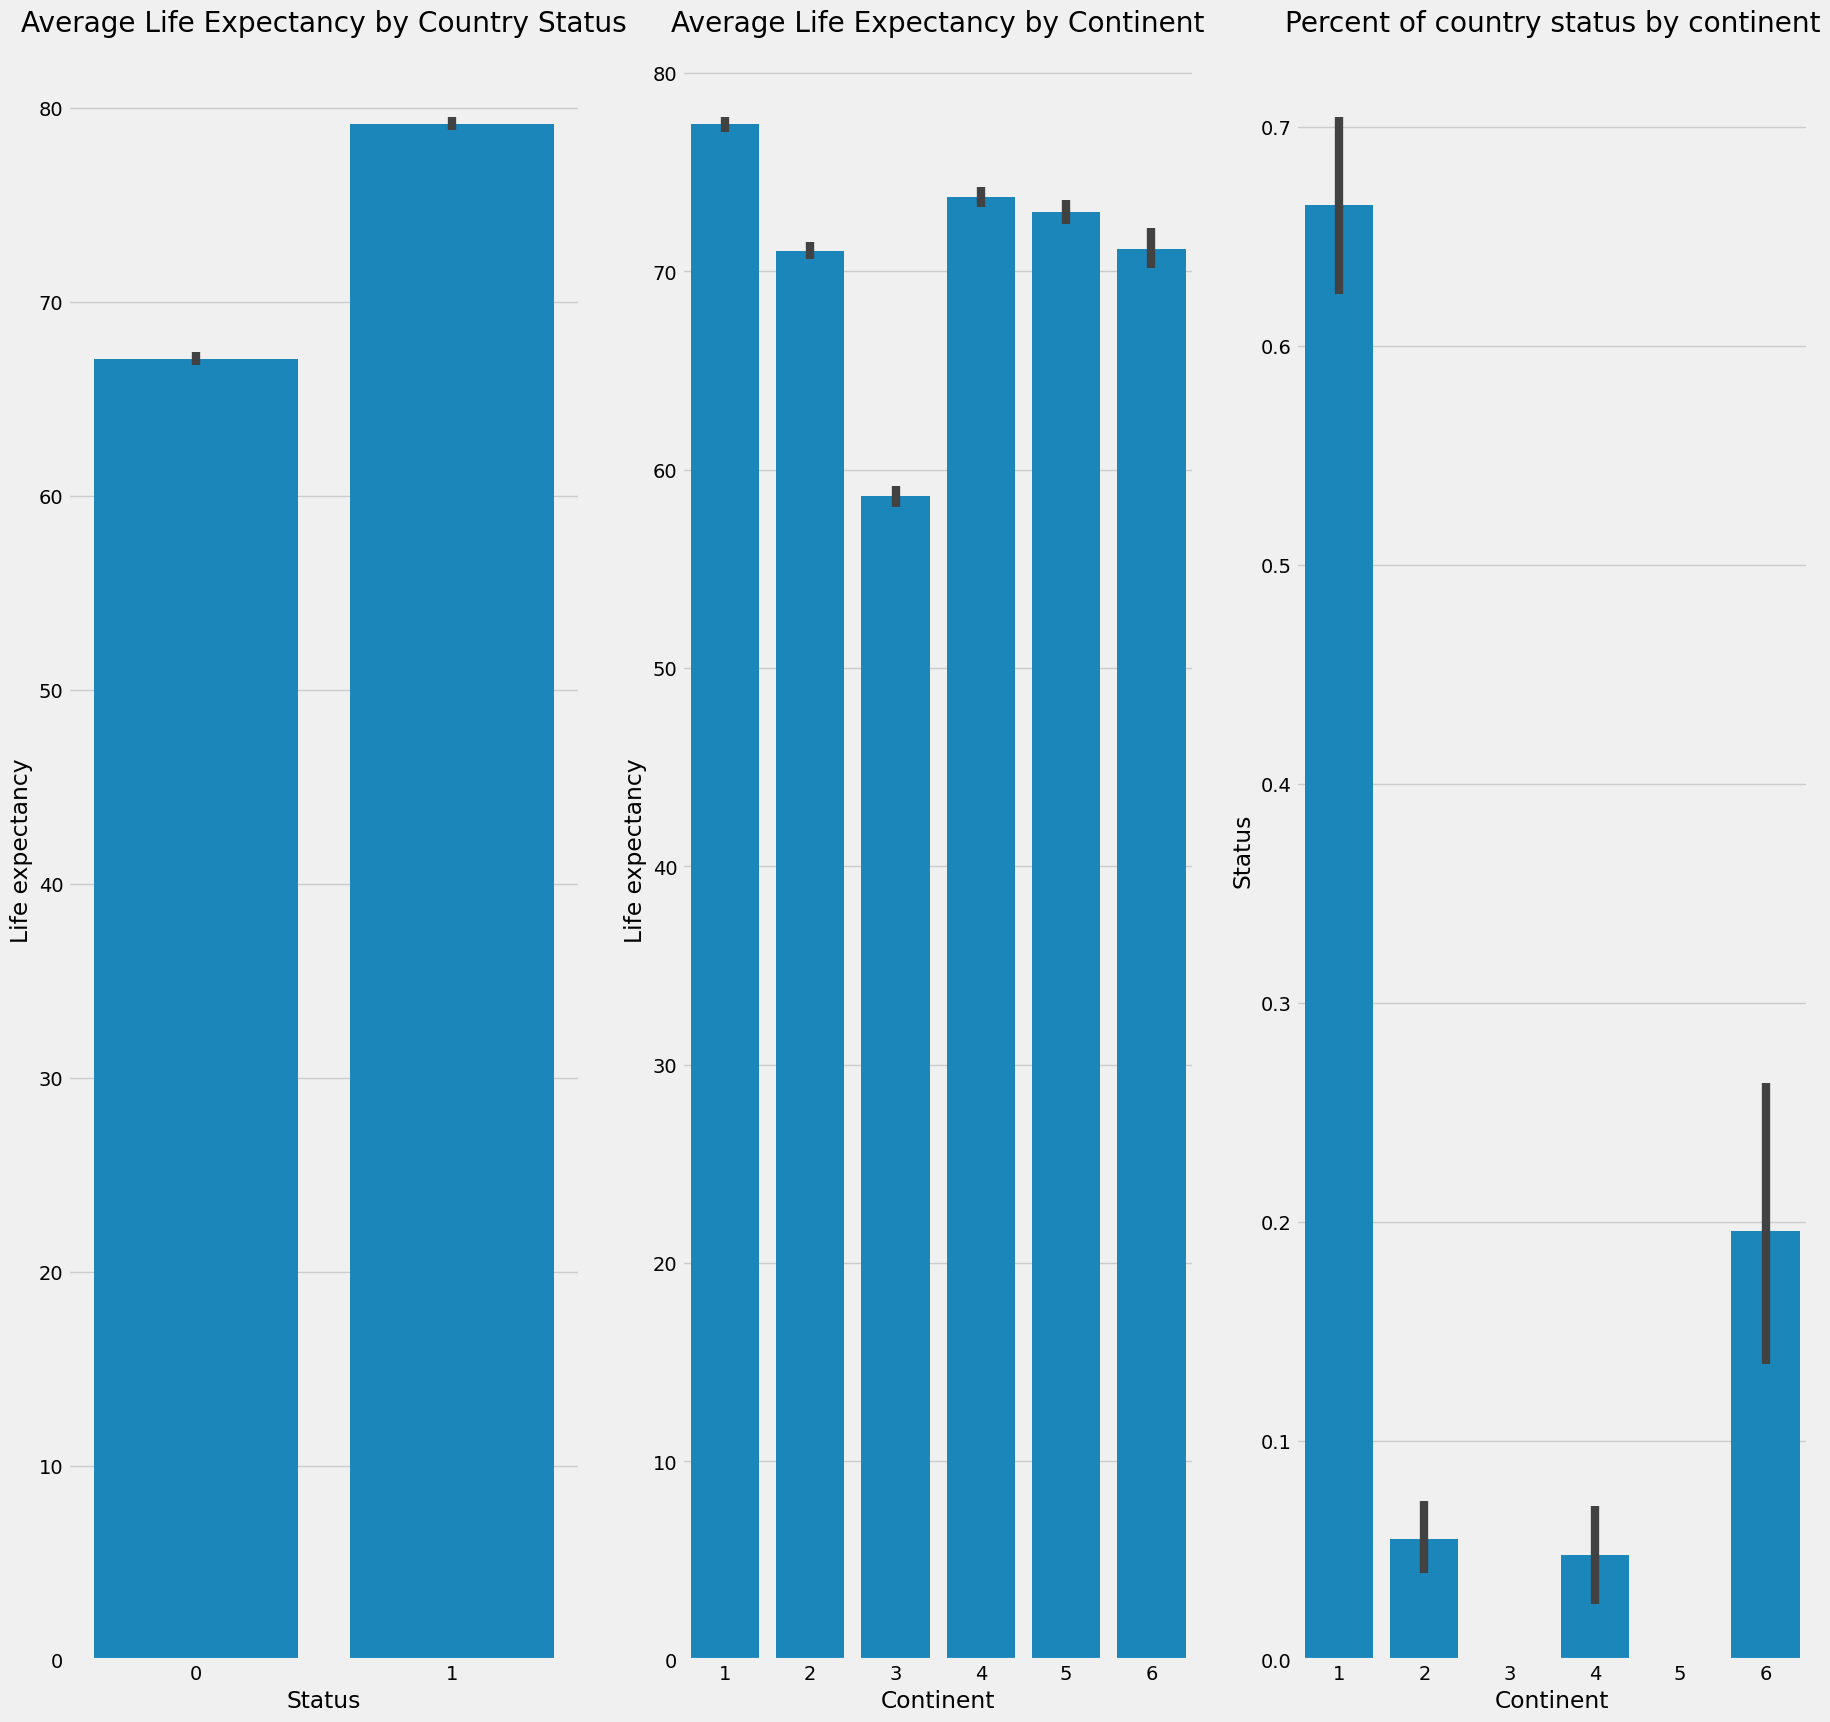

In [130]:
f,ax=plt.subplots(1,3,figsize=(20,20))
sns.barplot(x='Status', y='Life expectancy', data=data,ax=ax[0])
ax[0].set_title('Average Life Expectancy by Country Status')
sns.barplot(x='Continent', y='Life expectancy', data=data,ax=ax[1])
ax[1].set_title('Average Life Expectancy by Continent')
sns.barplot(x='Continent', y='Status', data=data,ax=ax[2])
ax[2].set_title('Percent of country status by continent')
plt.show()

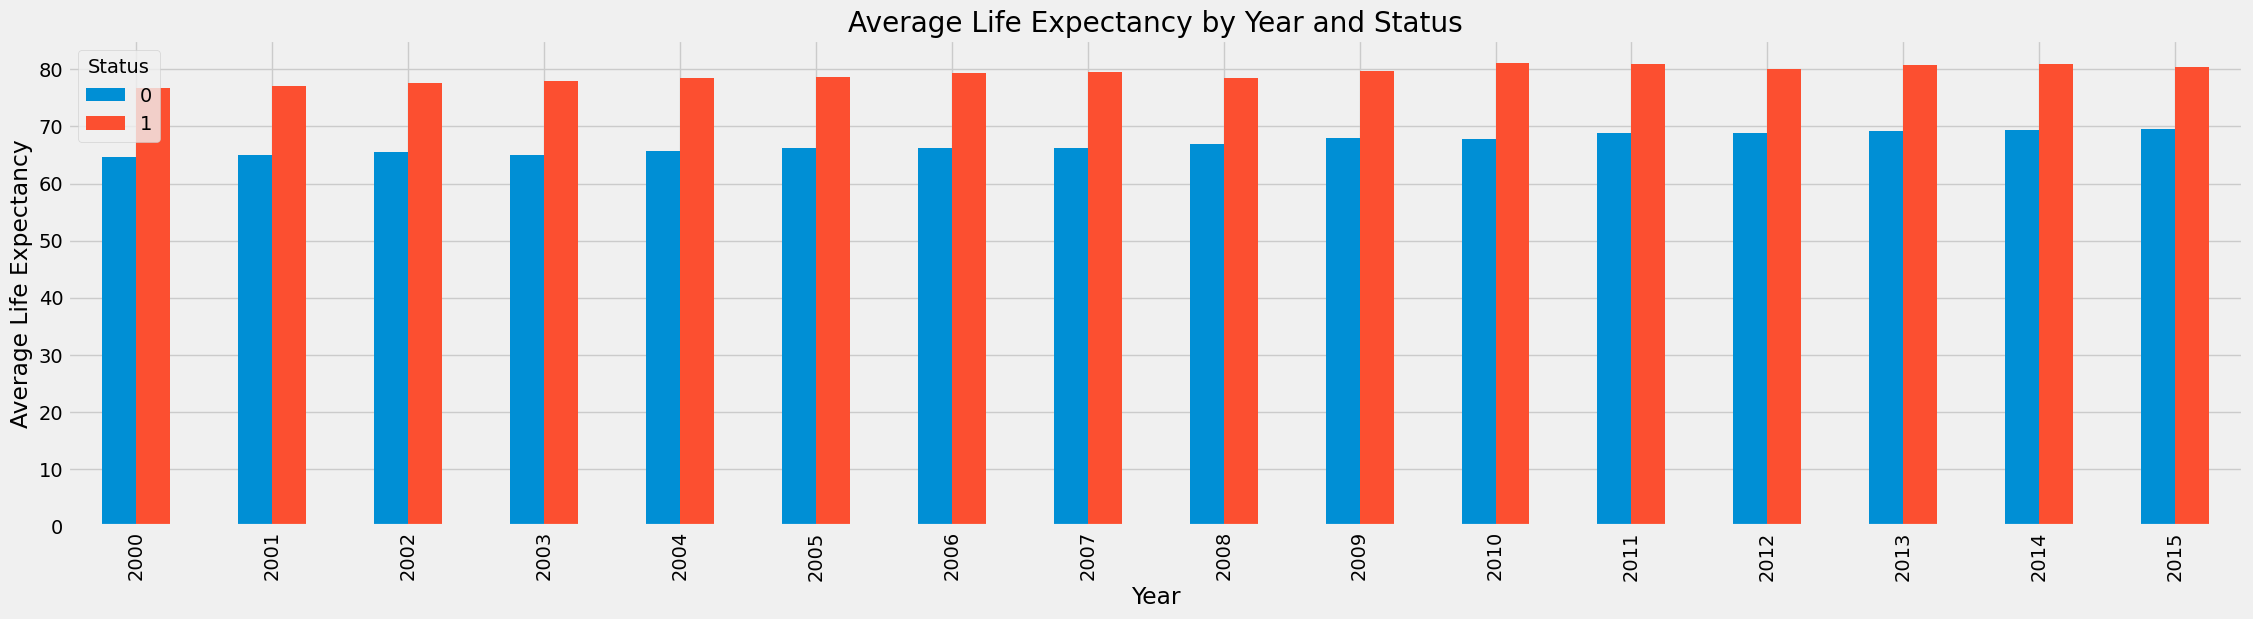

In [19]:
data_grouped = data.groupby(['Year', 'Status'])['Life expectancy'].mean().unstack()
data_grouped.plot.bar(figsize=(25, 6))
plt.title('Average Life Expectancy by Year and Status')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Status')
plt.show()

    Мы видим, что количество развивающихся стран велико по сравнению с развитыми, а средняя продолжительность жизни зависит от статуса страны, а также от континента. 
    Продолжительность жизни в зависимости от года изменяется, мы видим что средняя продолжительность жизни практически на всем промежутке растет для развивающихся стран, а для развитых стран сначала возрастает, а затем колеблется вокруг одного значения.
    Это довольно простые параметры, но они применимы только к настоящему моменту, в будущем статус стран будет меняться, и поэтому следует найти зависимости продолжительности жизни от других параметров

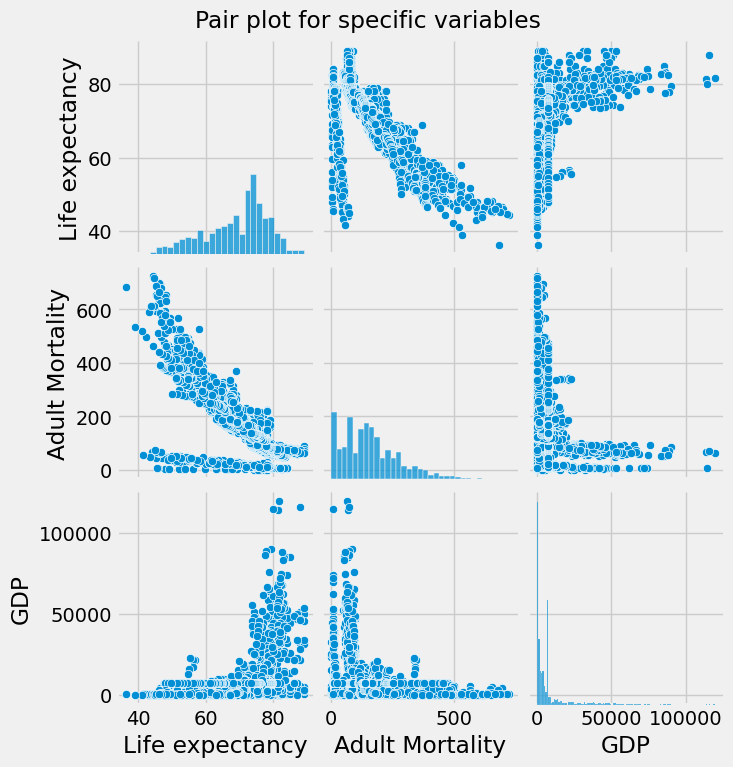

In [20]:
sns.pairplot(data[['Life expectancy', 'Adult Mortality', 'GDP']])
plt.suptitle('Pair plot for specific variables', y=1.02)
plt.show()
#чем больше ВВП тем - меньше люди умирают и люди дольше живут; люди дольше живут, если люди не умирают

    Чем больше ВВП страны, тем меньше люди умирают и люди дольше живут; 
    Продолжительность жизни высокая, если люди преждевременно не умирают (15-60 лет, согласно определению 'Adult Mortality')

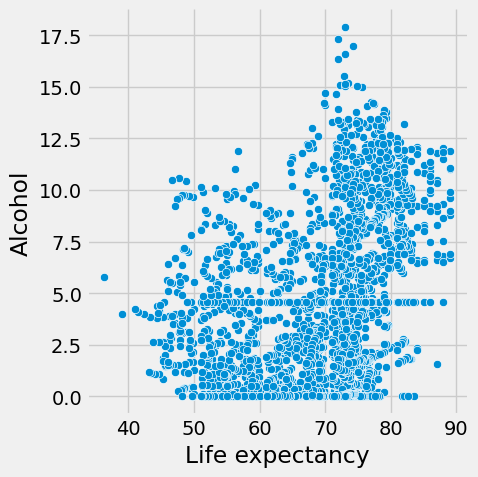

In [21]:
sns.relplot(data=data, x="Life expectancy", y="Alcohol")
plt.show()
#увеличиваем градус алкоголя, люди в среднем дольше живут

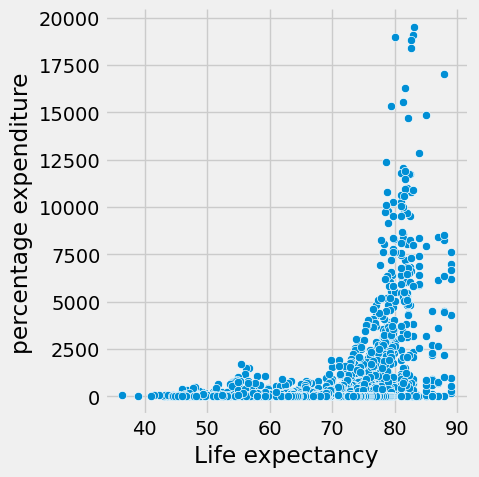

In [22]:
sns.relplot(data=data, x="Life expectancy", y="percentage expenditure")
plt.show()
#больше тратим на людей - люди дольше живут

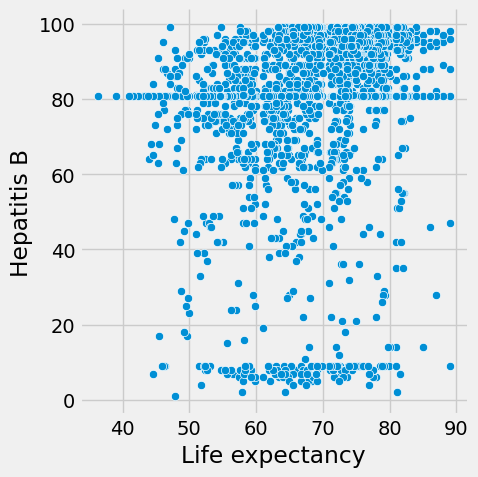

In [23]:
sns.relplot(data=data, x="Life expectancy", y="Hepatitis B")
plt.show()

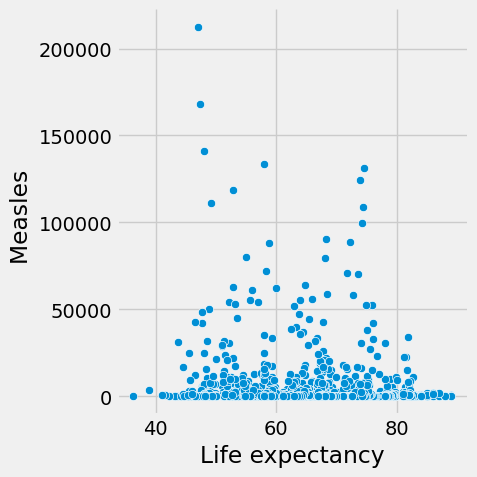

In [24]:
sns.relplot(data=data, x="Life expectancy", y="Measles ")
plt.show()
#люди не болеют корью - живут дольше

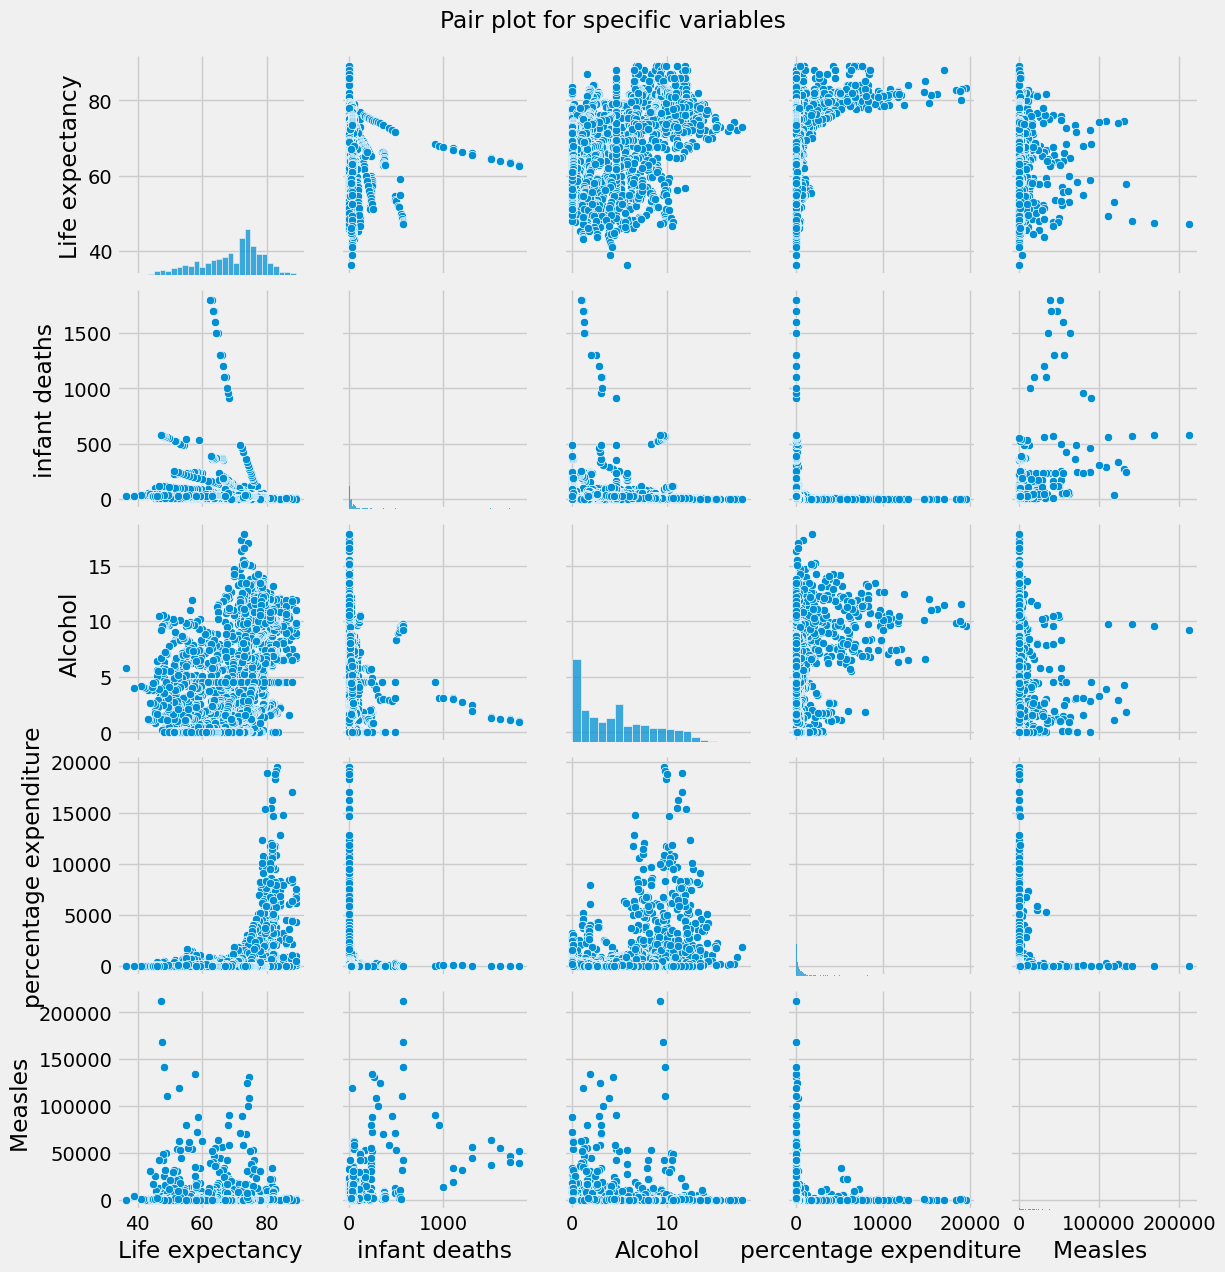

In [25]:
sns.pairplot(data[['Life expectancy', 'infant deaths', 'Alcohol', "percentage expenditure", "Measles "]])
plt.suptitle('Pair plot for specific variables', y=1.02)
plt.show()

    Продолжительность жизни от данных параметров зависит слабо, разве что 'percentage expenditure', что если тратим много денег, то и люди в среднем дольше живут. Остальные параметры, скорее всего, относительно слабо влияют на продолжительность жизни

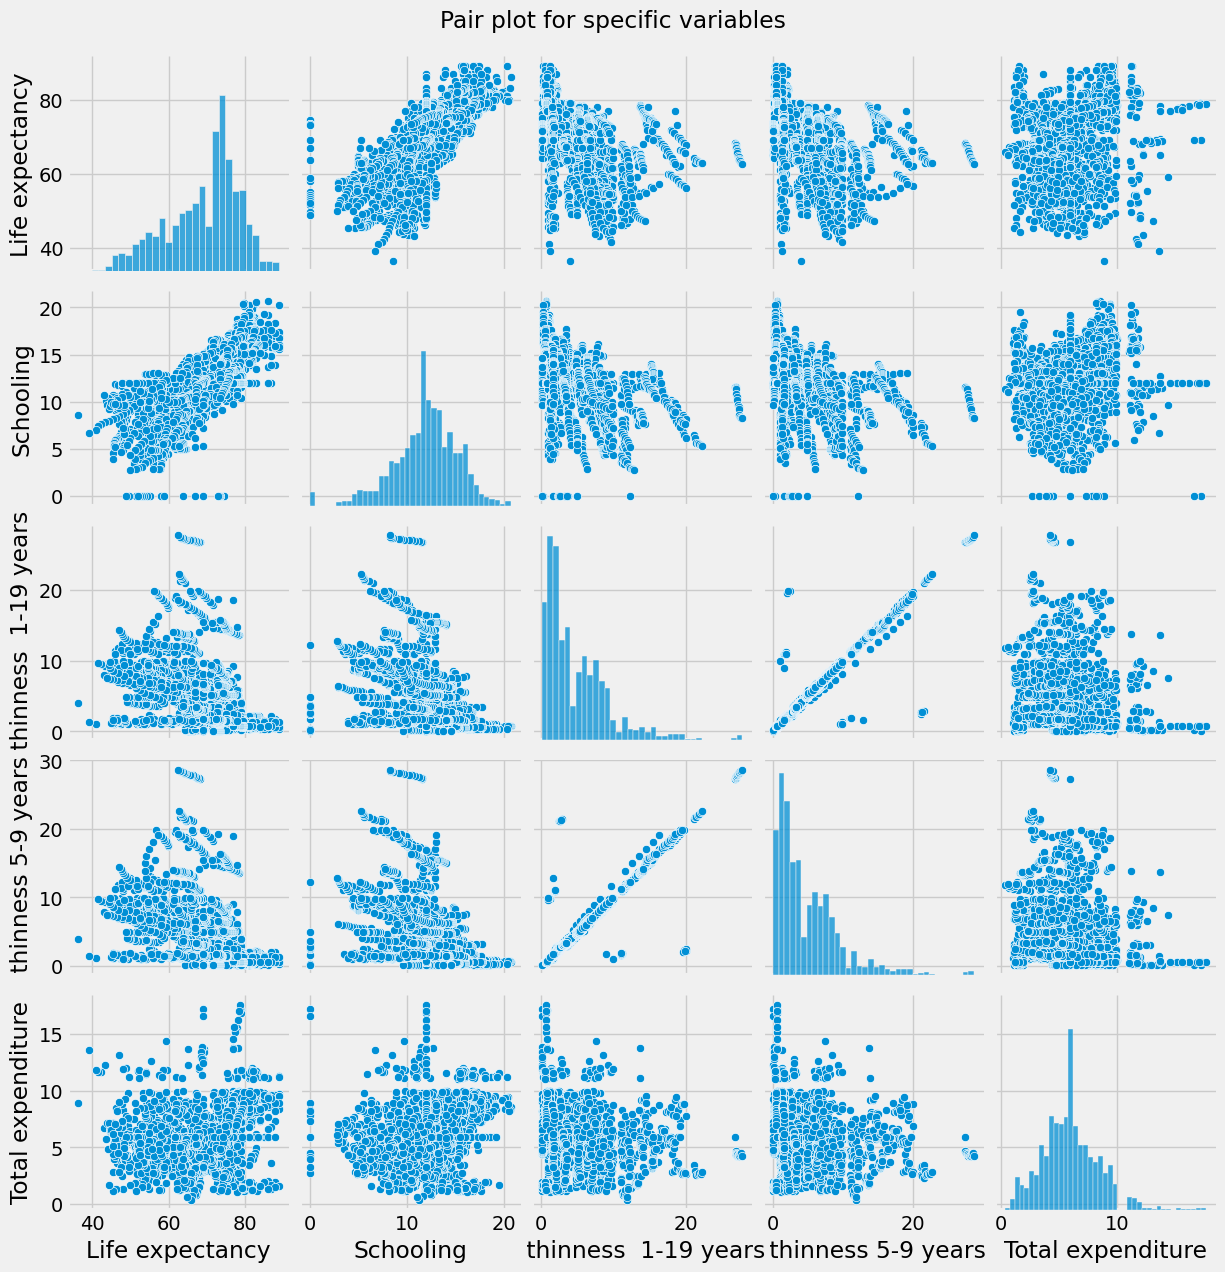

In [26]:
#Total expenditure, thinness  1-19 years
#thinness 5-9 years,Schooling
sns.pairplot(data[['Life expectancy', 'Schooling', ' thinness  1-19 years', " thinness 5-9 years", "Total expenditure"]])
plt.suptitle('Pair plot for specific variables', y=1.02)
plt.show()
#люди получают образование - живут намного дольше, с худобой в детском и молодом возрасте сложнее, но будто бы, если все нормального веса, то люди живут дольше
#с общими расходами так же непонятно, но видно, что чем больше этот параметр, тем менее люди страдают худобой в детстве и в молодости, так что можно 
#сказать, что он влияет положительно на продолжительность жизни

    Сразу видим линейную зависимость продолжительность жизни от 'schooling', то есть количество лет среднего образования (могу ошибаться), при увеличении 'schooling' увеличивается ожидаемая продолжительность жизни.
    Остальные параметры, скорее всего, слабо влияют на ожидаемую продолжительность жизни

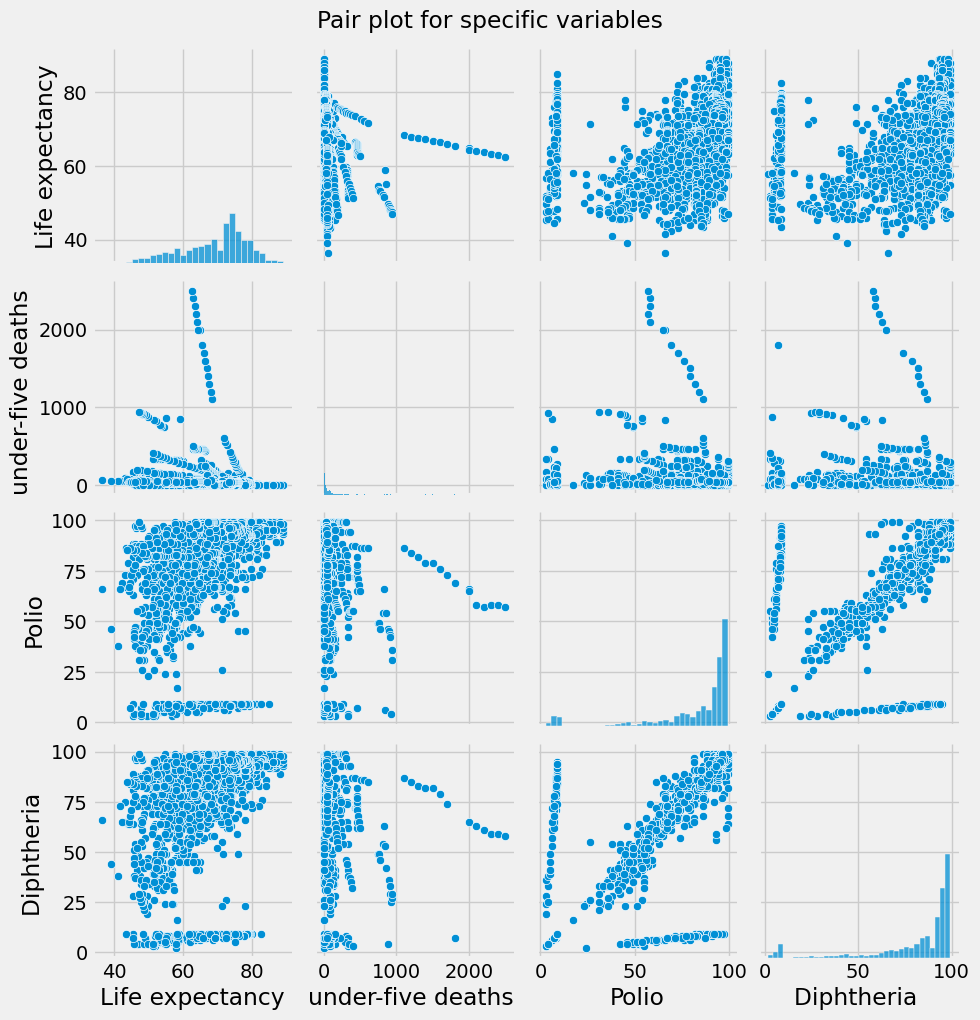

In [27]:
#under-five deaths ,Polio, Diphtheria, 
sns.pairplot(data[['Life expectancy', 'under-five deaths ', 'Polio', "Diphtheria "]])
plt.suptitle('Pair plot for specific variables', y=1.02)
plt.show()

    Мы видим, что параметры 'Polio' и 'Diphtheria' примерно одинаково влияют на ожидаемую продолжительность жизни. Влияние положительное, при значениях равным 100 продолжительность жизни увеличивается, но слабо. Смертность в детском возрасте не влияет на продолжительность жизни, либо его влияние очень слабое.

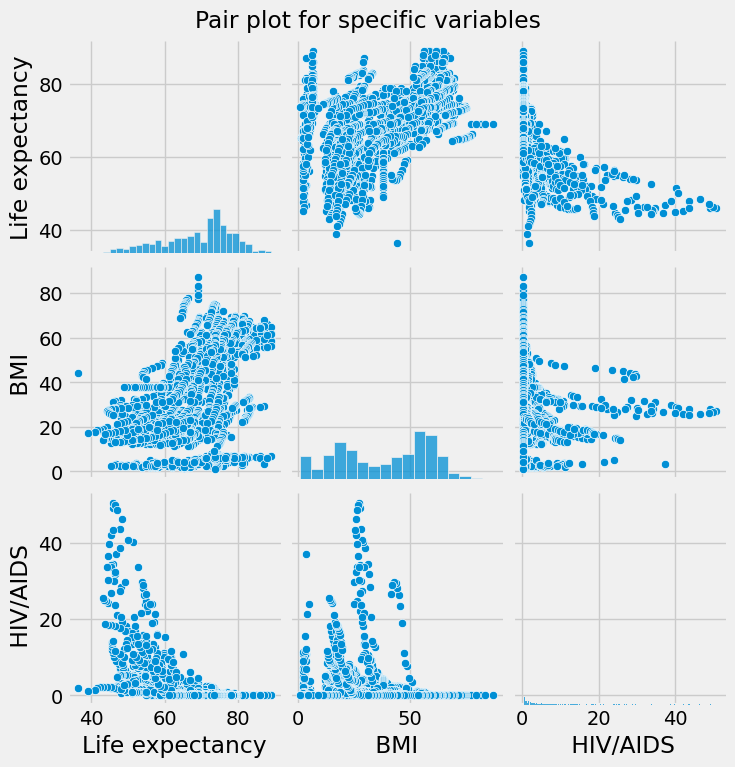

In [28]:
#BMI, HIV/AIDS
sns.pairplot(data[['Life expectancy', ' BMI ', ' HIV/AIDS']])
plt.suptitle('Pair plot for specific variables', y=1.02)
plt.show()
#непонятно как индекс массы тела работает здесь, но видно при HIV/AIDS, что люди живут очень мало, если много данного параметра

    Видим, что индекс массы тела ('BMI') и 'HIV/AIDS' влияют на ожидаемую продолжительность жизни. 
    При увеличении параметра 'BMI' в среднем продолжительность жизни увеличивается, но видим и обратную картину, что будто бы и не влияет.
    При увеличении 'HIV/AIDS' наблюдаем падение ожидаемой продолжительности жизни, но даже если этот параметр равен или приблизительно равен 0, то он также слабо влияет на ожидаемую продолжительность жизни

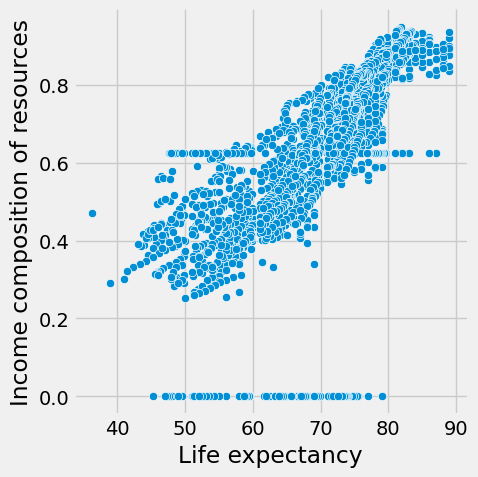

In [29]:
#Income composition of resources
sns.relplot(data=data, x="Life expectancy", y="Income composition of resources")
plt.show()
#линейная зависимость, чем больше процент, тем более дольше живут люди

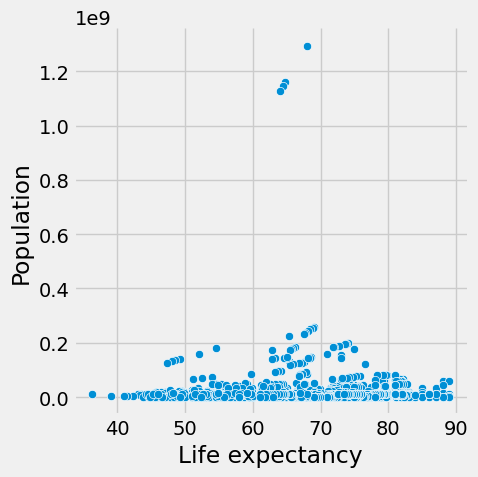

In [30]:
#Population
sns.relplot(data=data, x="Life expectancy", y="Population")
plt.show()
#размер населения будто бы не влияет, но проглядывается, что если страна слишком большая, то продолжительность жизни ниже, 

    Параметр "Income composition of resources" линейно зависим с продолжительностью жизни, чем больше данный параметр, тем больше ожидаемая продолжительность жизни
    У параметра 'Population' зависимость не проглядевыется


    Составим тепловую карту (Heatmap), которая будет показывать степень взаимосвязи всех параметров

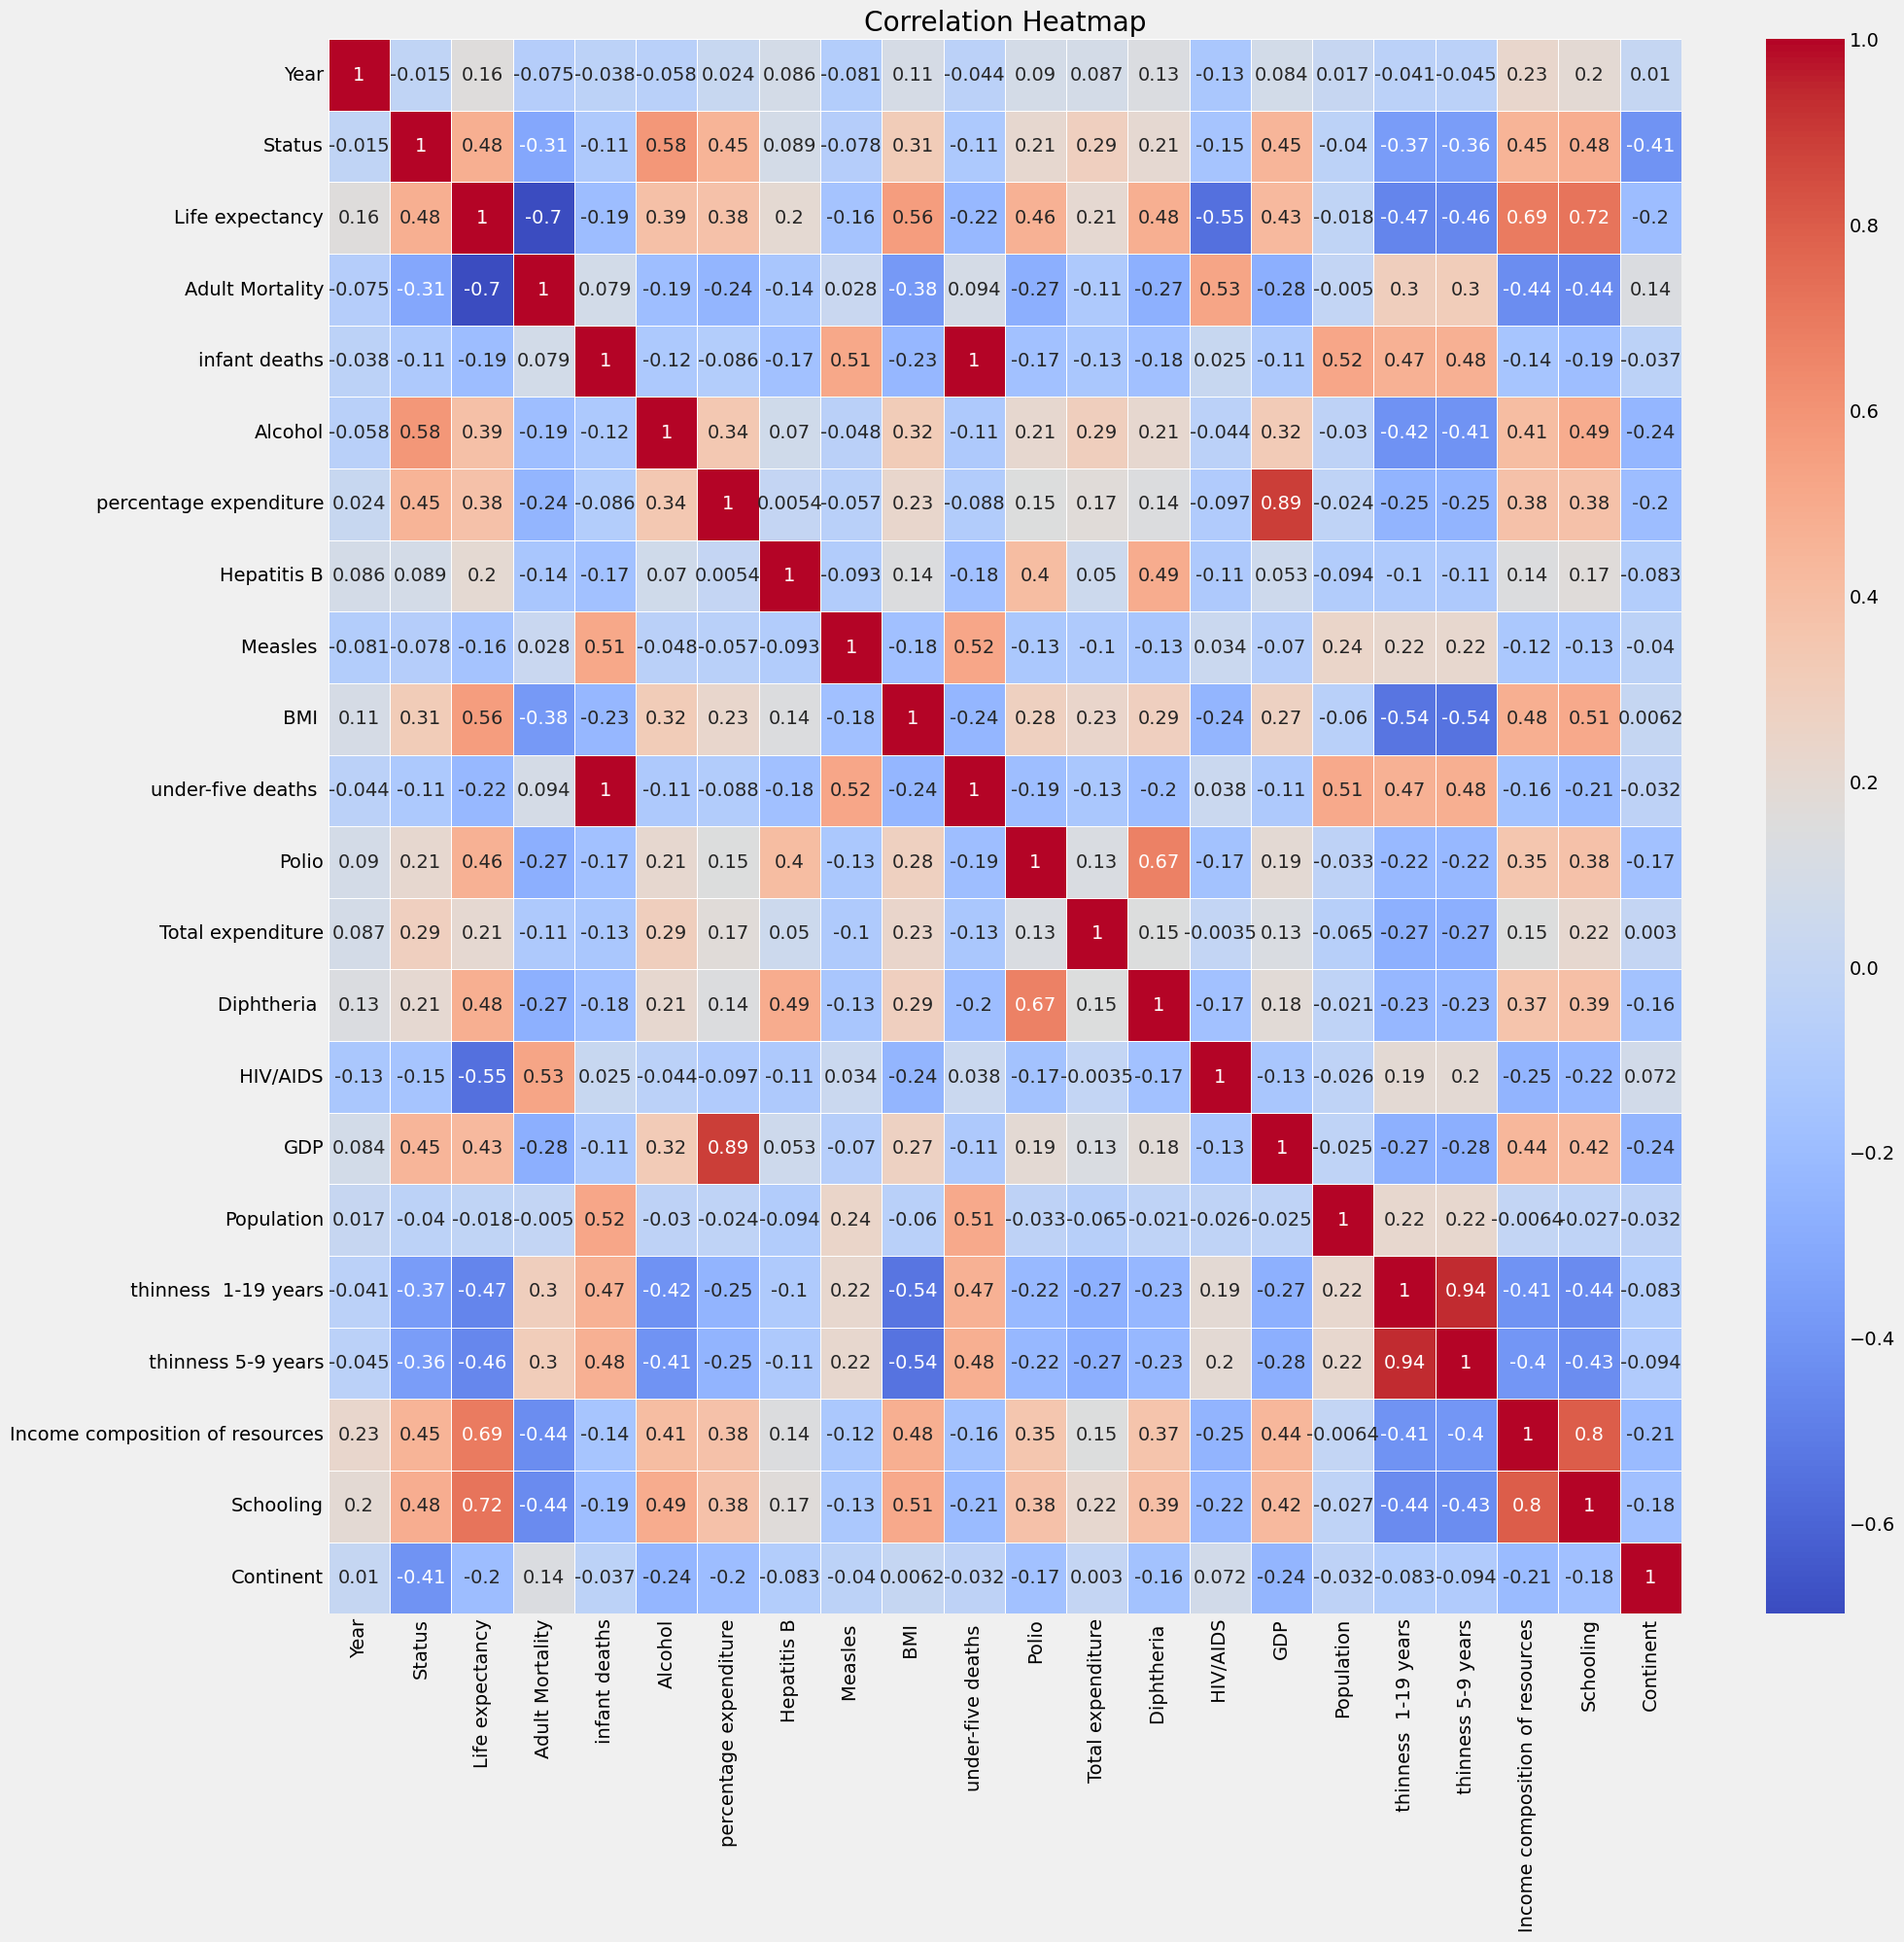

In [151]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
#заключение

    Итак, самые влиятельные на ожидаемую продолжительность жизни параметры:
        1. Schooling
        2. Adult mortality
        3. Income composition of resources
        4. BMI
        5. HIV/AIDS
        6. Status & Dipthetira
    На графиках данные параметры, как уже было сказано, относительно сильно влияют на ожидаемую продолжительность жизни.